# E-commerce Customer Clustering

This project will segment customers of an online store according to their buying behavior in order to customize marketing strategies, optimize campaigns and increase retention through clustering with K-Means and RFM analysis:
- Recency: How much time has passed since the customer's last purchase.
- Frequency: How many times the customer has purchased in a given period.
- Monetary: How much money the customer has spent in total.

## Library Import

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [406]:
df = pd.read_csv('online_retail.csv')

In [408]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Preparation

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [413]:
# Number of rows
df.shape[0]

541909

In [415]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [417]:
# NaN count values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [419]:
# Delete rows with null values
df.dropna(subset = ['CustomerID'], axis = 0, inplace = True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [421]:
# Conversion of InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
Index: 406829 entries, 0 to 541908
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
406829 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.2 MB


In [423]:
# Calculate TotalPrice, number of items by price of each CustomerID
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [425]:
# Exclusion of records that have product returns
df = df[df['Quantity'] > 0]

In [427]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Exploratory Data Analysis (EDA)

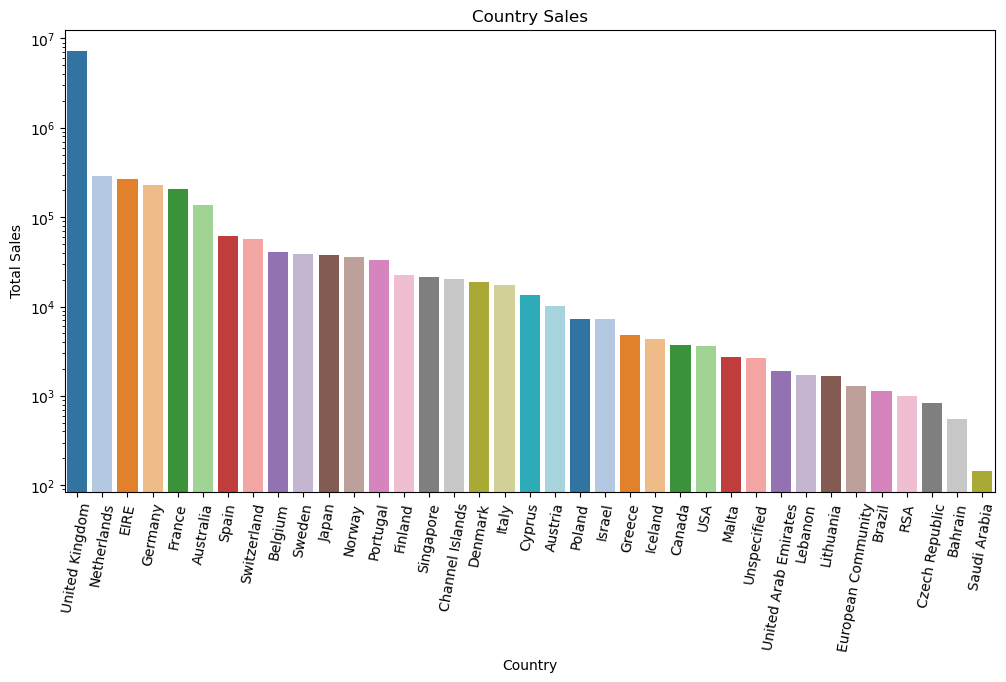

In [430]:
# Sales by Country
counrty_sales = df.groupby('Country')['TotalSales'].sum().reset_index().sort_values(by='TotalSales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data = counrty_sales, x = 'Country', y = 'TotalSales', hue = 'Country', palette = 'tab20')
plt.xticks(rotation=80)
plt.yscale('log')
plt.ylabel('Total Sales')
plt.title('Country Sales')
plt.show()

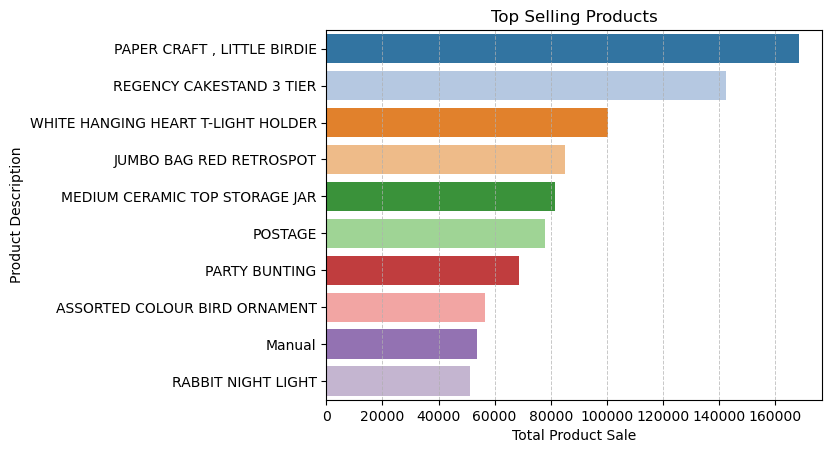

In [432]:
# Top selling products
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending = False).head(10).reset_index()

sns.barplot(data = top_products, x = 'TotalSales', y = 'Description', orient = 'h', hue = 'Description',palette = 'tab20')
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xlabel('Total Product Sale')
plt.ylabel('Product Description')
plt.title('Top Selling Products')
plt.show()

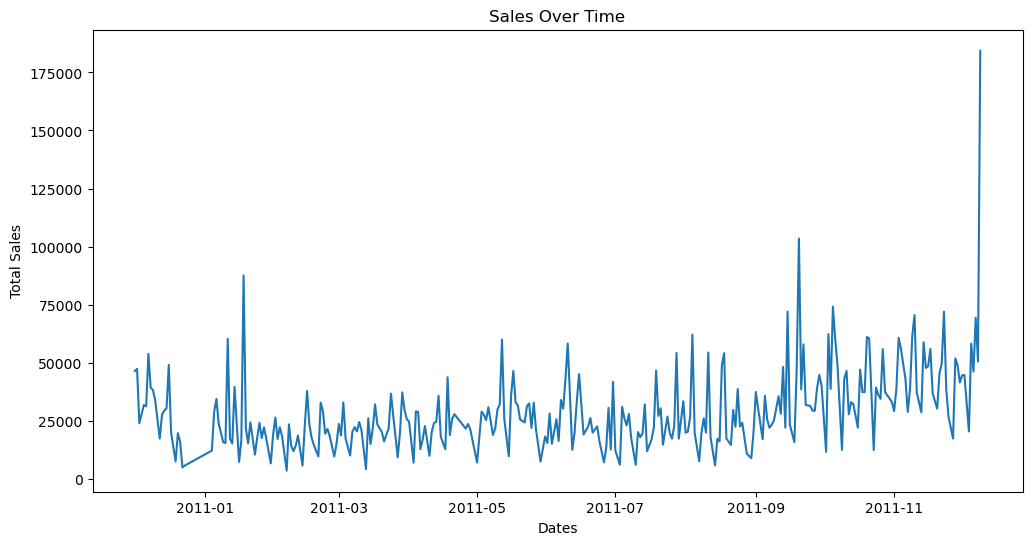

In [434]:
# Sales Over Time
date_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data = date_sales, x = 'InvoiceDate', y = 'TotalSales')
plt.xlabel('Dates')
plt.ylabel('Total Sales')
plt.title('Sales Over Time')
plt.show()

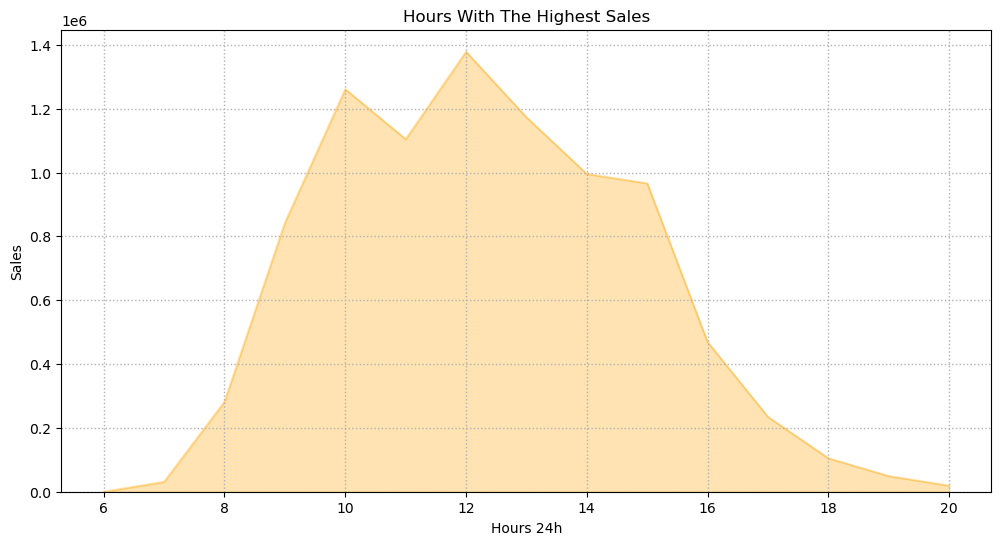

In [436]:
# Hours With The Highest Sales
df['Hour'] = df['InvoiceDate'].dt.hour
hour_sales = df.groupby('Hour')['TotalSales'].sum()

plt.figure(figsize=(12, 6))
hour_sales.plot(kind = 'area', alpha=0.3, color='orange')
plt.grid(linestyle='dotted', linewidth=1)
plt.xlabel('Hours 24h')
plt.ylabel('Sales')
plt.title('Hours With The Highest Sales')
plt.show()

## Creation of RFM variables (Recency, Frequency, Monetary)

In [439]:
# Calculation of the customer reference date to obtain Recency, the last date a purchase was made
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days = 1)

# RFM
rfm = df.groupby('CustomerID').agg(
    {'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency - Subtract that date from the reference_date to get how many days have passed since your last purchase.
    'InvoiceNo': 'nunique',                                     # Frequency - Count how many different invoice numbers (InvoiceNo) that customer has.
    'TotalSales': 'sum'}).reset_index()                         # Monetary - Adds the total amount spent by the customer on all purchases.

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4334,18280.0,278,1,180.60
4335,18281.0,181,1,80.82
4336,18282.0,8,2,178.05
4337,18283.0,4,16,2094.88


The result is a data frame that summarizes the behavior of each customer.

First customer(12346): 
- Recency: last purchase was 326 days ago
- Frequency: made only one purchase
- Monetary: spent 77183.60

Valuable cash customer, but inactive and lacking loyalty. Could have been a very large one-time purchase. Possible lost customer. It is worth analyzing whether it was a wholesale buyer or by mistake.

Second customer(12347): 
- Recency: last purchase 2 days ago
- Frequency: bought 7 items 
- Monetary: 4310.00

This is an ideal customer: active, frequent and with good monetary value. Should be prioritized for loyalty programs, referrals and offers.

Third customer(12348):
- Recency: last purchase 75 days ago
- Frequency: bought 4 items
- Monetary: expense 1797.24

Moderately valuable customer, but has not purchased for some time. May be starting to drop out. Ideal for a reactivation or retention campaign.

## Data Normalization

In [443]:
# Z-Score Normalization
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

## Determining the optimal number of clusters

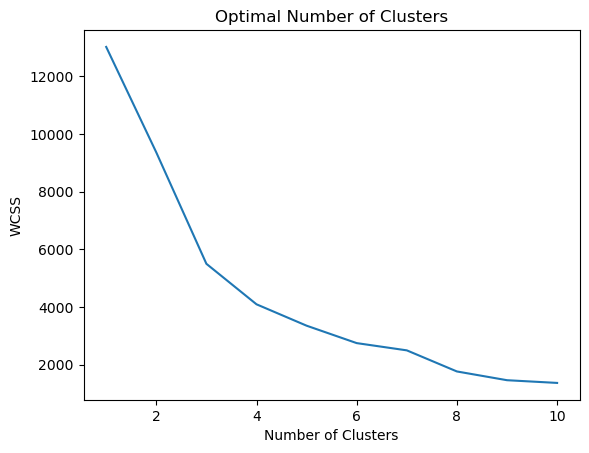

In [446]:
# Elbow Method
df_num = df[['CustomerID','UnitPrice','Quantity','TotalSales']]
wcss = [] # Sum of squared distances inside the cluster

# Ten K-Means models (with K from 1 to 10) are trained and the WCSS of each one is stored,
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Model Development

In [449]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,1
1,12347.0,2,7,4310.00,0
2,12348.0,75,4,1797.24,0
3,12349.0,19,1,1757.55,0
4,12350.0,310,1,334.40,1
...,...,...,...,...,...
4334,18280.0,278,1,180.60,1
4335,18281.0,181,1,80.82,1
4336,18282.0,8,2,178.05,0
4337,18283.0,4,16,2094.88,0


Each row (customer) now has a cluster assigned to it, allowing customer profiles to be analyzed.

In [452]:
# Summary of average RFM values per cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Num_Customers'})

print(cluster_summary)

            Recency  Frequency      Monetary  Num_Customers
Cluster                                                    
0         41.445682   4.671928   1855.367927           3231
1        247.106285   1.582255    631.424206           1082
2          6.038462  66.500000  85904.351538             26


- Cluster 0 : This cluster groups regular or standard customers.
- Cluster 1 : This cluster groups inactive or almost lost customers, with low frequency and low spending.
- Cluster 2 : This cluster groups the VIP or top customers, the most valuable to the business. They are very active and spend a lot.

## Principal Component Analysis (PCA)

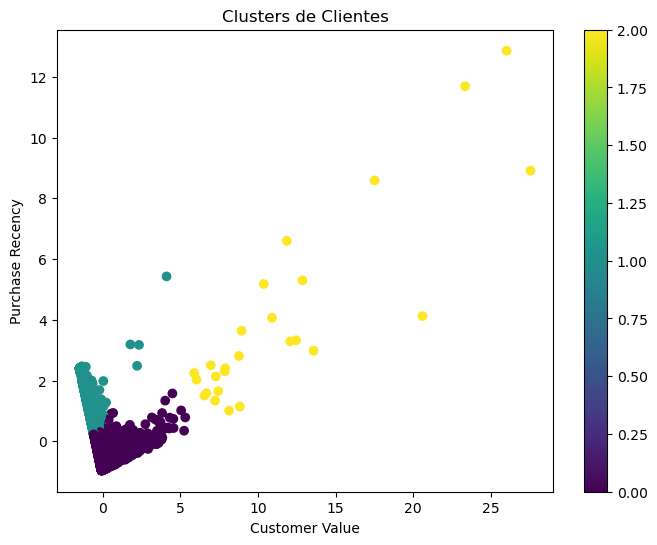

In [456]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=rfm['Cluster'])
plt.xlabel('Customer Value')
plt.ylabel('Purchase Recency')
plt.title('Clusters de Clientes')
plt.colorbar()
plt.show()

## Conclusion

Analyzed a customer base of 4,338 individuals using K-Means clustering, resulting in three distinct segments:

Cluster 0 – Standard Customers (74%, 3,231 customers):
Represent the majority of the customer base. Recommended strategy: retain engagement through targeted promotions and loyalty benefits.

Cluster 1 – Inactive or Lost Customers (24%, 1,082 customers):
Show low recent activity and value. Recommended strategy: attempt reactivation via personalized offers or re-engagement campaigns.

Cluster 2 – VIP Customers (0.59%, 26 customers):
High-frequency, high-value clients. Recommended strategy: maintain loyalty by offering exclusive services and premium rewards.